In [ ]:
pip install SuperSuit==3.6.0 pettingzoo==1.22.0

In [1]:
import numpy as np
import math
import random
from collections import namedtuple, deque
from itertools import count
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions.categorical import Categorical

from supersuit import color_reduction_v0, frame_stack_v1, resize_v1
import datetime
# check this ipd_v6 and ipd_v7 difference whether ipd v6 makes the difference
from ipd_v7 import ipd # first_obs = {0,0}
from IPD_utils import batchify_obs, batchify, unbatchify, save_buffer, plot_buffer, save_loss, pop, save_action,plot
from Agent import DQN, Agent_1, Agent_2
from train import TRAINER, ReplayMemory, plot_durations, args

## seed=7, max_cycles=16, num_episodes = 1000

In [10]:
args.num_episodes = 1000
args.seed = 7
args.max_cycles = 16
torch.manual_seed(args.seed)

In [11]:
Trainer = TRAINER(args = args, env = ipd('ansi').env)
return_buffer, return_buffer_x, loss_buffer, action_buffer = Trainer.train()

agents:  ['player_0', 'player_1']
>>> episode : 0
{(0, 0): (2.8267054968031515, 2.8267054968031515), (0, 1): (0.27876022974566195, 4.417382752491975), (1, 0): (4.918756514888236, -0.08294480024754146), (1, 1): (0.9132359262689175, 0.9132359262689175)}
Data Buffering Complete
Training Complete
>>> episode : 1
{(0, 0): (2.8125880782916366, 2.8125880782916366), (0, 1): (-0.03937271452380616, 5.211483211439667), (1, 0): (5.112072681171735, 0.6380135875294546), (1, 1): (1.7069970869264415, 1.7069970869264415)}
Data Buffering Complete
Training Complete
>>> episode : 2
{(0, 0): (3.4774164223842754, 3.4774164223842754), (0, 1): (-0.039502299196421495, 4.711617428107624), (1, 0): (4.203051468860241, 0.4632623491376469), (1, 1): (0.5637218054893631, 0.5637218054893631)}
Data Buffering Complete
Training Complete
>>> episode : 3
{(0, 0): (2.6615487118342362, 2.6615487118342362), (0, 1): (0.19042553997082046, 4.961398979653878), (1, 0): (4.874208190194502, -0.040222643428722595), (1, 1): (0.8744136

In [12]:
return_dir = 'v7_r_5.csv'
action_dir = 'v7_a_5.csv'
return_x_dir = 'v7_rx_5.csv'
save_buffer(return_buffer,return_dir)
save_buffer(return_buffer_x,return_x_dir)
save_action(action_buffer,action_dir)

,player 0,player 1
0,1,0
1,0,1
2,0,1
3,1,1
4,0,1
...,...,...
15995,1,1
15996,1,1
15997,1,1
15998,0,1


## seed=6, max_cycles=16, num_episodes = 1000

In [2]:
args.num_episodes = 1000
args.seed = 6
args.max_cycles = 16
torch.manual_seed(args.seed)

In [3]:
Trainer = TRAINER(args = args, env = ipd('ansi').env)
return_buffer, return_buffer_x, loss_buffer, action_buffer = Trainer.train()

agents:  ['player_0', 'player_1']
>>> episode : 0
{(0, 0): (2.809058865648629, 2.809058865648629), (0, 1): (-0.3333823156559571, 5.504439376892291), (1, 0): (5.400312546802441, -0.11958349626583363), (1, 1): (0.9299013229685862, 0.9299013229685862)}
Data Buffering Complete
Training Complete
>>> episode : 1
{(0, 0): (3.277564250147828, 3.277564250147828), (0, 1): (-0.13062003158183466, 5.072978440978895), (1, 0): (5.332767153712725, -0.3685405293305835), (1, 1): (0.5957314437902178, 0.5957314437902178)}
Data Buffering Complete
Training Complete
>>> episode : 2
{(0, 0): (3.0506630219203146, 3.0506630219203146), (0, 1): (-0.09015321589518178, 4.624567152744477), (1, 0): (4.919388737433887, 0.1600785901730814), (1, 1): (0.5958801946854015, 0.5958801946854015)}
Data Buffering Complete
Training Complete
>>> episode : 3
{(0, 0): (3.2444886858255493, 3.2444886858255493), (0, 1): (0.3280646116167114, 4.579893407456824), (1, 0): (5.596285075035386, 0.0007287726541875481), (1, 1): (0.805827770940

In [4]:
return_dir = 'v7_r_4.csv'
action_dir = 'v7_a_4.csv'
return_x_dir = 'v7_rx_4.csv'
save_buffer(return_buffer,return_dir)
save_buffer(return_buffer_x,return_x_dir)
save_action(action_buffer,action_dir)

,player 0,player 1
0,1,0
1,0,1
2,1,1
3,1,1
4,0,1
...,...,...
15995,0,1
15996,0,1
15997,0,1
15998,0,1


/home/u00805/RL/BootDQN-SSD/IPD_utils.py:70: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, palette=sns.color_palette("magma", as_cmap=True), linewidth=1.0)


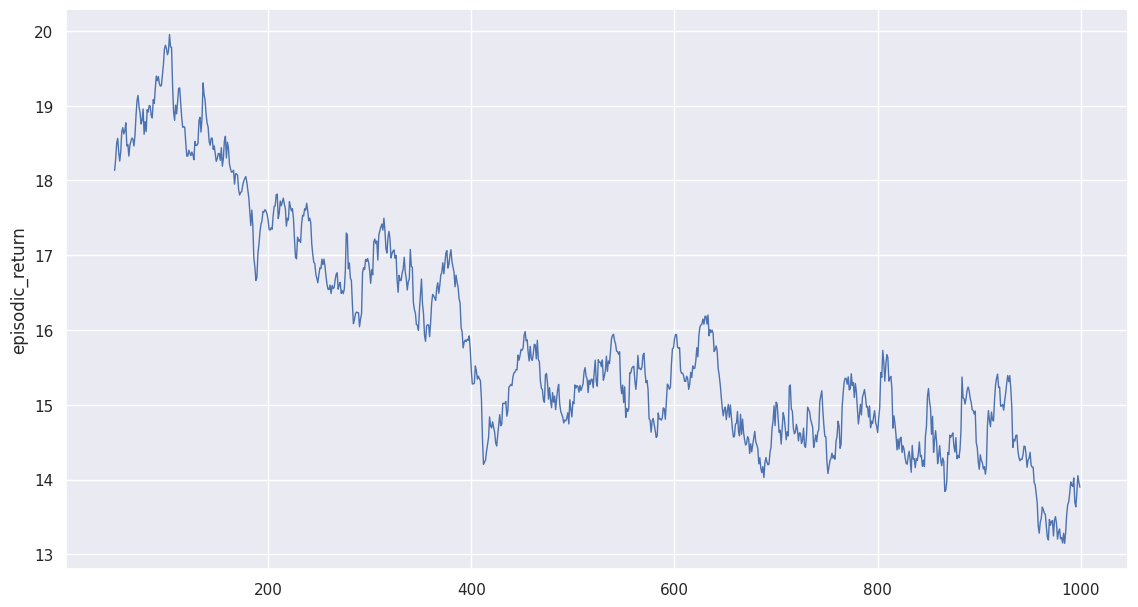

In [5]:
plot(return_dir)

In [6]:
pd.read_csv(return_dir).describe()

,episodic_return
count,1000.000000
mean,15.867392
std,5.828509
min,1.762497
25%,11.674654
50%,15.385178
75%,19.125784
max,43.714390


In [7]:
actions = pd.read_csv(action_dir)
print(actions['player 0'].value_counts())
print(actions['player 1'].value_counts())

0    8499
1    7501
Name: player 0, dtype: int64
1    13599
0     2401
Name: player 1, dtype: int64


In [8]:
7501/16000

0.4688125

In [9]:
13599/16000

0.8499375

## seed=5, max_cycles=16, num_episodes = 1000

In [2]:
args.num_episodes = 1000
args.seed = 5
args.max_cycles = 16
torch.manual_seed(args.seed)

In [3]:
Trainer = TRAINER(args = args, env = ipd('ansi').env)
return_buffer, return_buffer_x, loss_buffer, action_buffer = Trainer.train()

agents:  ['player_0', 'player_1']
>>> episode : 0
{(0, 0): (2.606966890674841, 2.606966890674841), (0, 1): (-0.09975484337169997, 5.243862184785679), (1, 0): (5.180954449012366, 0.26092051952484274), (1, 1): (1.0036287885316393, 1.0036287885316393)}
Data Buffering Complete
Training Complete
>>> episode : 1
{(0, 0): (3.586909172065518, 3.586909172065518), (0, 1): (0.24841993294528253, 5.0163266865165905), (1, 0): (4.5073123939627395, 0.15299989845074216), (1, 1): (0.8443795858528397, 0.8443795858528397)}
Data Buffering Complete
Training Complete
>>> episode : 2
{(0, 0): (2.9141555022984065, 2.9141555022984065), (0, 1): (-0.6783566666970414, 4.9965669294158515), (1, 0): (4.765196787783439, 0.0833376807060653), (1, 1): (1.1173130164446543, 1.1173130164446543)}
Data Buffering Complete
Training Complete
>>> episode : 3
{(0, 0): (3.1955081184086205, 3.1955081184086205), (0, 1): (-0.0037374400049232886, 5.276362442249079), (1, 0): (5.0666612963819055, 0.36163056179013536), (1, 1): (1.11006401

In [4]:
args

Namespace(batch_size=128, num_episodes=1000, seed=5, max_cycles=16, obs_lim=3, memory_size=98304, learning_rate=0.001, target_update=10)

In [5]:
return_dir = 'v7_r_3.csv'
action_dir = 'v7_a_3.csv'
return_x_dir = 'v7_rx_3.csv'
save_buffer(return_buffer,return_dir)
save_buffer(return_buffer_x,return_x_dir)
save_action(action_buffer,action_dir)

,player 0,player 1
0,0,0
1,1,0
2,1,1
3,1,1
4,1,1
...,...,...
15995,0,1
15996,0,1
15997,1,1
15998,1,1


/home/u00805/RL/BootDQN-SSD/IPD_utils.py:70: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, palette=sns.color_palette("magma", as_cmap=True), linewidth=1.0)


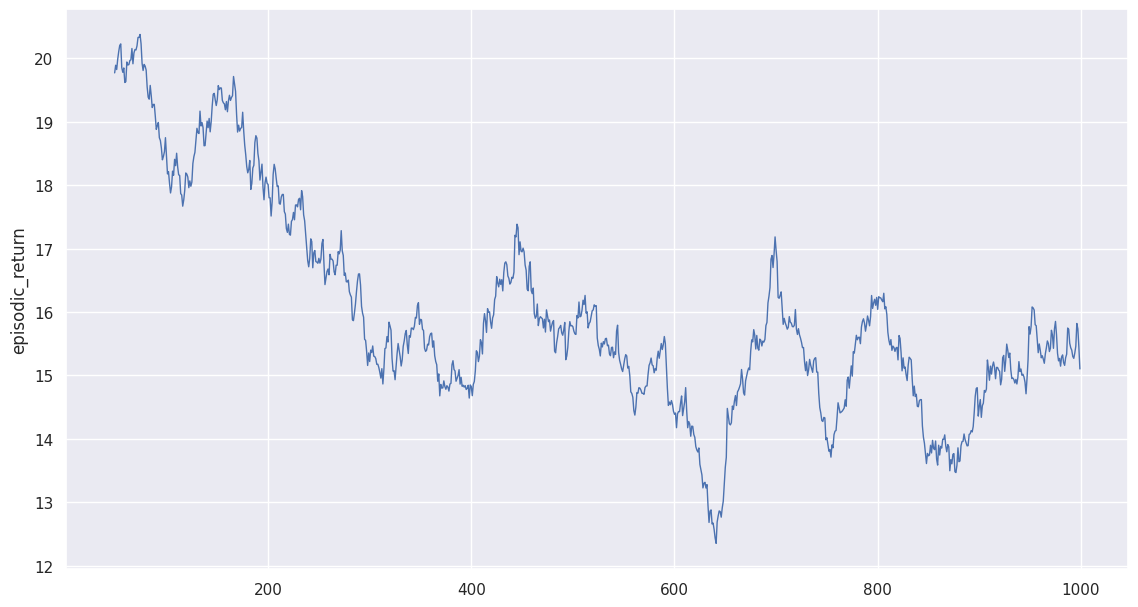

In [6]:
plot(return_dir)

In [7]:
pd.read_csv(return_dir).describe()

,episodic_return
count,1000.000000
mean,16.025805
std,6.133628
min,2.198566
25%,11.720366
50%,15.297570
75%,19.615461
max,43.647078


In [8]:
actions = pd.read_csv(action_dir)
print(actions['player 0'].value_counts())
print(actions['player 1'].value_counts())

0    8925
1    7075
Name: player 0, dtype: int64
1    13390
0     2610
Name: player 1, dtype: int64


In [9]:
7075/16000

0.4421875

In [11]:
13390/16000

0.836875

## seed=4, max_cycles=16

In [2]:
args.num_episodes = 1000
args.seed = 4
args.max_cycles = 16
torch.manual_seed(args.seed)

In [3]:
Trainer = TRAINER(args = args, env = ipd('ansi').env)
return_buffer, return_buffer_x, loss_buffer, action_buffer = Trainer.train()

agents:  ['player_0', 'player_1']
>>> episode : 0
{(0, 0): (2.8285894785678876, 2.8285894785678876), (0, 1): (0.09445688826391486, 4.9420340161889795), (1, 0): (5.103583407205374, -0.5223638601068583), (1, 1): (0.5004006169958505, 0.5004006169958505)}
Data Buffering Complete
Training Complete
>>> episode : 1
{(0, 0): (3.439532003567672, 3.439532003567672), (0, 1): (0.06504159855565918, 5.383773155545121), (1, 0): (4.648994837162445, -0.031943421389481697), (1, 1): (1.035714661314055, 1.035714661314055)}
Data Buffering Complete
Training Complete
>>> episode : 2
{(0, 0): (2.6810844219822916, 2.6810844219822916), (0, 1): (-0.10936245343963309, 4.5128686007234), (1, 0): (4.4975829545392925, -0.15092690598298966), (1, 1): (1.5250059921633445, 1.5250059921633445)}
Data Buffering Complete
Training Complete
>>> episode : 3
{(0, 0): (2.9808652496164307, 2.9808652496164307), (0, 1): (-0.3010581250752642, 4.880038940488147), (1, 0): (5.560736012849261, -0.19978038917866747), (1, 1): (0.9175932034

In [4]:
return_dir = 'v7_r_3.csv'
action_dir = 'v7_a_3.csv'
return_x_dir = 'v7_rx_3.csv'
save_buffer(return_buffer,return_dir)
save_buffer(return_buffer_x,return_x_dir)
save_action(action_buffer,action_dir)

,player 0,player 1
0,0,0
1,1,0
2,0,1
3,1,1
4,0,1
...,...,...
15995,0,1
15996,1,1
15997,0,1
15998,0,1


/home/u00805/RL/BootDQN-SSD/IPD_utils.py:70: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, palette=sns.color_palette("magma", as_cmap=True), linewidth=1.0)


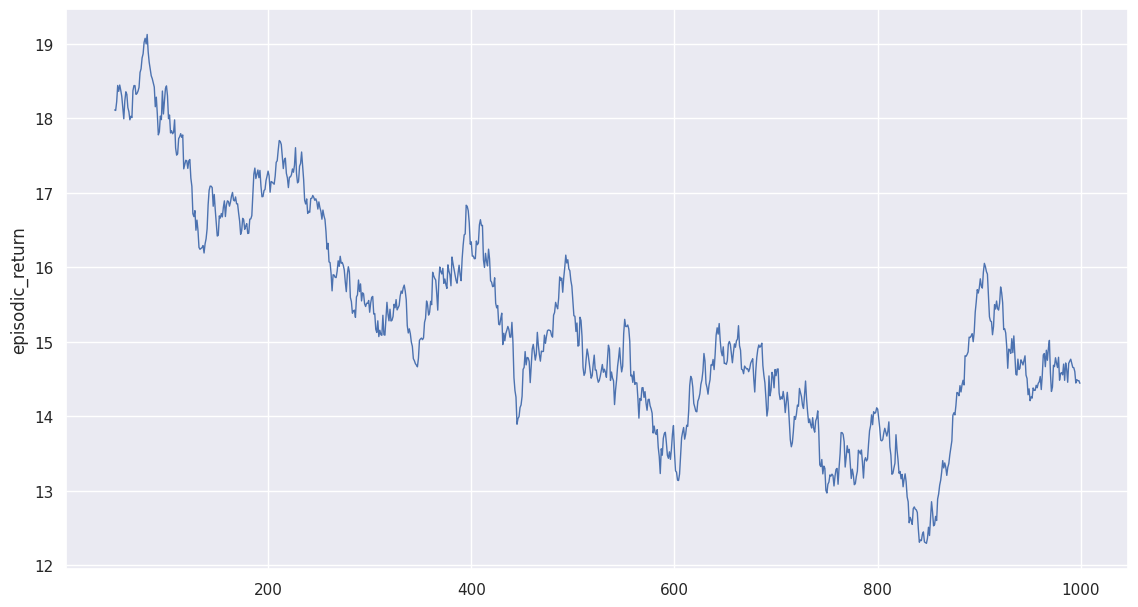

In [5]:
plot(return_dir)

In [6]:
pd.read_csv(return_dir).describe()

,episodic_return
count,1000.000000
mean,15.287646
std,5.406054
min,-0.285950
25%,11.603302
50%,15.046971
75%,18.381066
max,36.726282


/home/u00805/RL/BootDQN-SSD/IPD_utils.py:70: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, palette=sns.color_palette("magma", as_cmap=True), linewidth=1.0)


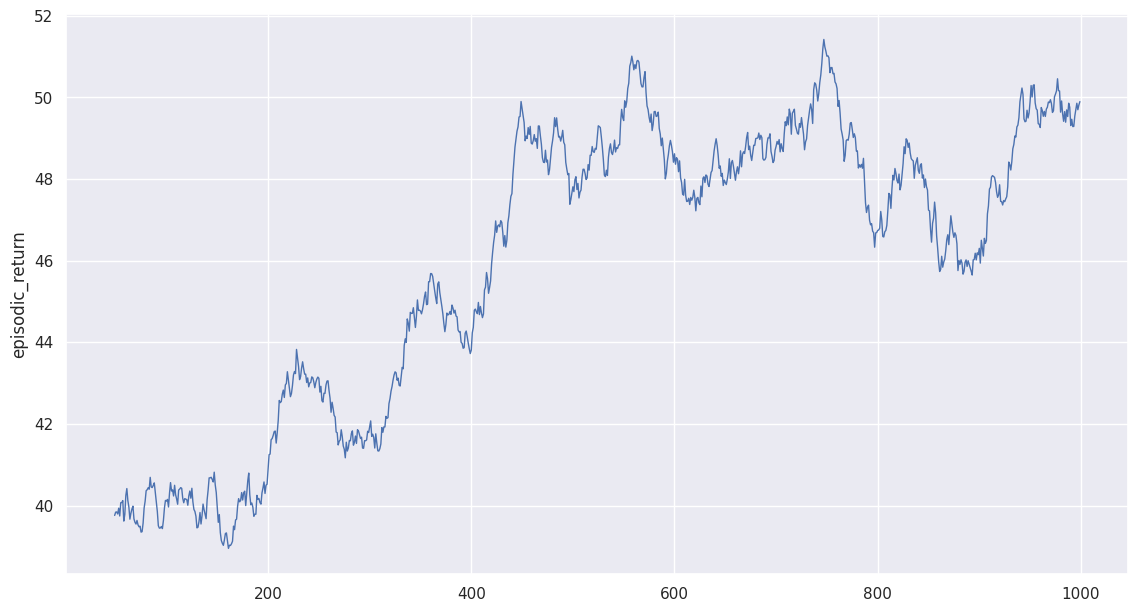

In [7]:
plot(return_x_dir)

In [8]:
pd.read_csv(return_x_dir).describe()

,episodic_return
count,1000.000000
mean,45.877947
std,8.526489
min,11.985194
25%,39.757014
50%,45.873609
75%,52.039872
max,68.773490


In [5]:
actions = pd.read_csv('v7_a_3.csv')
print(actions['player 0'].value_counts())
print(actions['player 1'].value_counts())

0    8315
1    7685
Name: player 0, dtype: int64
1    13806
0     2194
Name: player 1, dtype: int64


In [6]:
7685/16000

0.4803125

In [9]:
13806/16000

0.862875

## seed=4, max_cycles=32

In [2]:
args.num_episodes = 1000
args.seed = 4
args.max_cycles = 32
torch.manual_seed(args.seed)

In [3]:
Trainer = TRAINER(args = args, env = ipd('ansi').env)
return_buffer, return_buffer_x, loss_buffer, action_buffer = Trainer.train()

agents:  ['player_0', 'player_1']
>>> episode : 0
{(0, 0): (3.07564804508667, 3.07564804508667), (0, 1): (-0.3252464183887041, 5.20697978877742), (1, 0): (4.3174004382996864, -0.4918310437720008), (1, 1): (1.2124118179216261, 1.2124118179216261)}
Data Buffering Complete
Training Complete
>>> episode : 1
{(0, 0): (2.92025965921824, 2.92025965921824), (0, 1): (-0.15668913217989802, 5.5032368745311135), (1, 0): (4.626378340426115, -0.27397993850592317), (1, 1): (1.112425135902959, 1.112425135902959)}
Data Buffering Complete
Training Complete
>>> episode : 2
{(0, 0): (3.079483607096186, 3.079483607096186), (0, 1): (-0.08603938791392278, 4.807105656390768), (1, 0): (4.651016189787898, -0.060387092139700956), (1, 1): (0.8800287743205232, 0.8800287743205232)}
Data Buffering Complete
Training Complete
>>> episode : 3
{(0, 0): (3.382409450685533, 3.382409450685533), (0, 1): (-0.07177519430754953, 4.86178454684408), (1, 0): (5.328351899127118, -0.0506502460829696), (1, 1): (0.5798493447302844, 0

In [4]:
return_dir = 'v7_r_2.csv'
action_dir = 'v7_a_2.csv'
return_x_dir = 'v7_rx_2.csv'
save_buffer(return_buffer,return_dir)
save_buffer(return_buffer_x,return_x_dir)
save_action(action_buffer,action_dir)

,player 0,player 1
0,1,0
1,1,1
2,0,1
3,0,1
4,1,1
...,...,...
31995,0,1
31996,0,1
31997,0,1
31998,0,1


/home/u00805/RL/BootDQN-SSD/IPD_utils.py:70: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, palette=sns.color_palette("magma", as_cmap=True), linewidth=1.0)


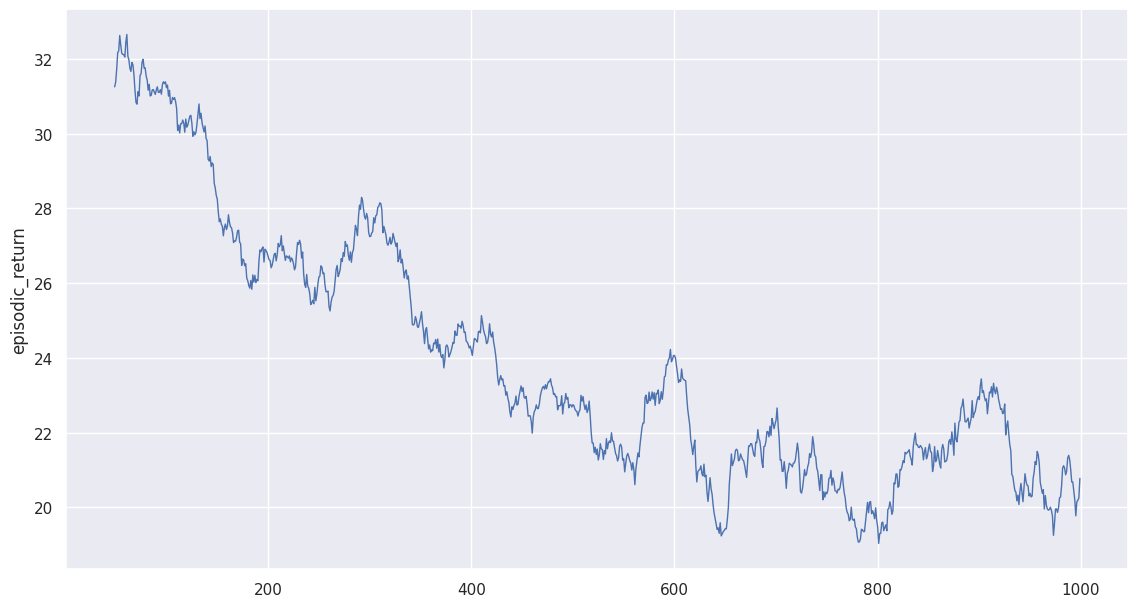

In [6]:
plot(return_dir)

In [7]:
returns = pd.read_csv(return_dir)
returns.describe()

,episodic_return
count,1000.000000
mean,23.935678
std,8.984526
min,-0.882087
25%,17.956563
50%,23.969948
75%,29.976013
max,64.139161


/home/u00805/RL/BootDQN-SSD/IPD_utils.py:70: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, palette=sns.color_palette("magma", as_cmap=True), linewidth=1.0)


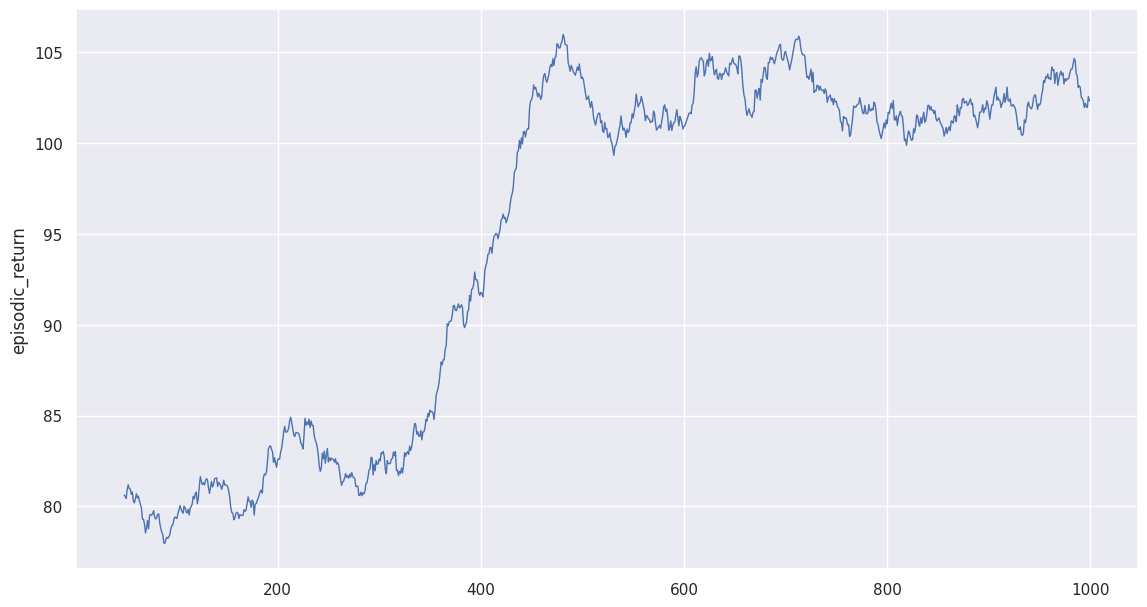

In [8]:
plot(return_x_dir)

In [9]:
returns = pd.read_csv(return_x_dir)
returns.describe()

,episodic_return
count,1000.000000
mean,94.720505
std,15.257009
min,45.218752
25%,84.402496
50%,94.747088
75%,105.596180
max,141.238456


## seed=4, max_cycles=64

In [2]:
args.num_episodes = 1000
args.seed = 4
args.max_cycles = 64
torch.manual_seed(args.seed)

In [3]:
Trainer = TRAINER(args = args, env = ipd('ansi').env)

agents:  ['player_0', 'player_1']


In [4]:
return_buffer, return_buffer_x, loss_buffer, action_buffer = Trainer.train()

>>> episode : 0
{(0, 0): (2.4172397737016587, 2.4172397737016587), (0, 1): (0.07598006639467153, 5.149913639102384), (1, 0): (4.813422549403386, 0.3081453431060787), (1, 1): (1.2537762942753612, 1.2537762942753612)}
Data Buffering Complete
Training Complete
>>> episode : 1
{(0, 0): (2.898060727618086, 2.898060727618086), (0, 1): (-0.11774412206362493, 4.602642608875225), (1, 0): (5.316578273519228, -0.269704220675076), (1, 1): (1.657108948160955, 1.657108948160955)}
Data Buffering Complete
Training Complete
>>> episode : 2
{(0, 0): (3.669954982205715, 3.669954982205715), (0, 1): (0.162629441477688, 5.176949018260187), (1, 0): (4.653138835660431, -0.00205033167719277), (1, 1): (0.8000610823859968, 0.8000610823859968)}
Data Buffering Complete
Training Complete
>>> episode : 3
{(0, 0): (3.1645802961886997, 3.1645802961886997), (0, 1): (0.0837935274060053, 5.046507159837213), (1, 0): (5.343111559511263, 0.08060336346877507), (1, 1): (1.1751435535120032, 1.1751435535120032)}
Data Buffering 

In [5]:
return_dir = 'v7_r_1.csv'
action_dir = 'v7_a_1.csv'
save_buffer(return_buffer,return_dir)
save_action(action_buffer,action_dir)

,player 0,player 1
0,0,0
1,1,0
2,1,1
3,0,1
4,1,1
...,...,...
63995,1,1
63996,0,1
63997,0,1
63998,0,1


/home/u00805/RL/BootDQN-SSD/IPD_utils.py:70: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, palette=sns.color_palette("magma", as_cmap=True), linewidth=1.0)


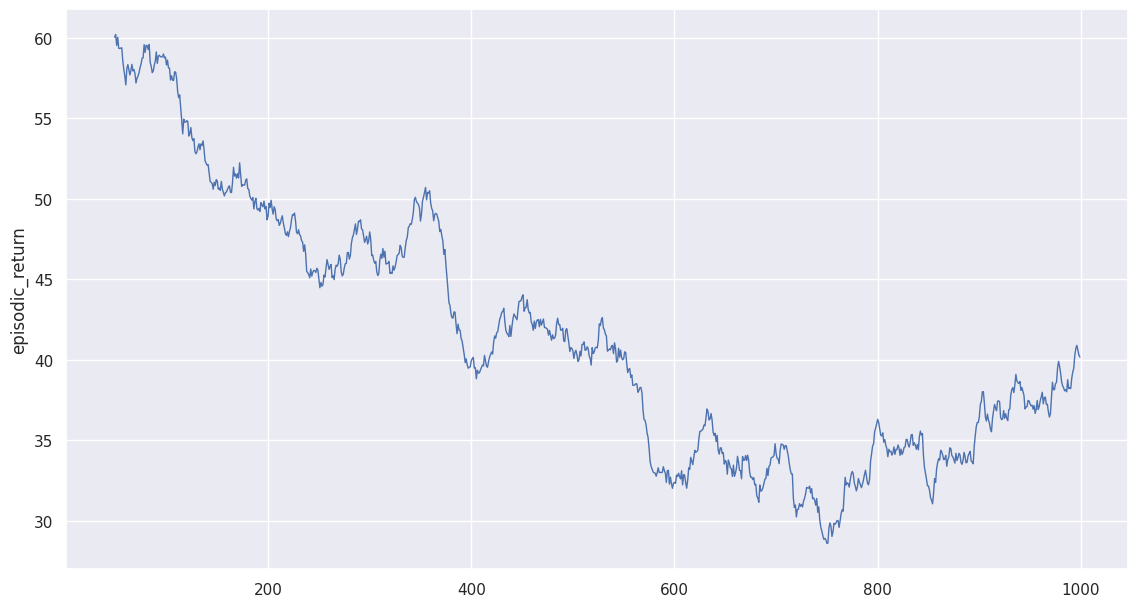

In [6]:
plot(return_dir)

In [7]:
returns = pd.read_csv(return_dir)
returns.describe()

,episodic_return
count,1000.000000
mean,41.821945
std,16.648241
min,-17.297704
25%,31.129686
50%,41.692607
75%,52.916632
max,96.642374


In [5]:
return_dir = 'v7_r_1.csv'
action_dir = 'v7_a_1.csv'
save_buffer(return_buffer,return_dir)
save_action(action_buffer,action_dir)

,player 0,player 1
0,1,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
63995,0,1
63996,0,1
63997,1,1
63998,1,1


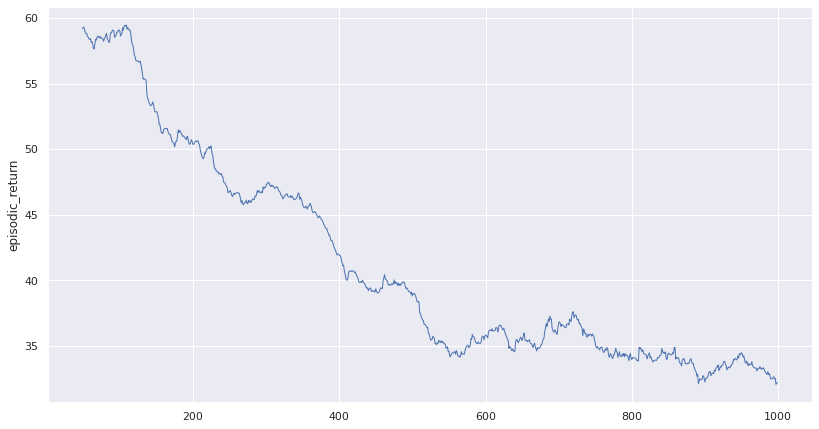

In [7]:
plot(return_dir)

In [8]:
returns = pd.read_csv(return_dir)
returns.describe()

,episodic_return
count,1000.00000
mean,41.34900
std,10.68407
min,21.00000
25%,33.00000
50%,40.00000
75%,48.00000
max,94.00000


In [5]:
return_dir = 'v7_r_1.csv'
action_dir = 'v7_a_1.csv'
save_buffer(return_buffer,return_dir)
save_action(action_buffer,action_dir)

,player 0,player 1
0,0,0
1,0,0
2,1,0
3,1,1
4,0,1
...,...,...
95995,0,1
95996,0,1
95997,0,1
95998,0,1


In [7]:
sns.set(rc={'figure.figsize':(13.7,7.27)})

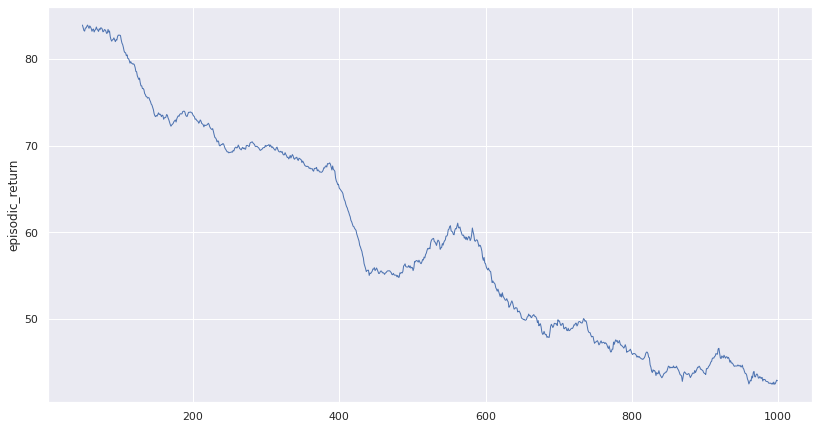

In [8]:
plot(return_dir)

{C,C}: 16*3 = 48; {D,C}: 16*5 = 80

DQN tends to exploit

In [9]:
returns = pd.read_csv(return_dir)
returns.describe()

,episodic_return
count,1000.000000
mean,59.209000
std,15.114555
min,30.000000
25%,46.000000
50%,58.000000
75%,71.000000
max,105.000000


In [14]:
args

Namespace(batch_size=128, num_episodes=1000, seed=3, max_cycles=96, obs_lim=3, memory_size=98304, learning_rate=0.001, target_update=10)

In [6]:
return_dir = 'v7_r_1.csv'
action_dir = 'v7_a_1.csv'
save_buffer(return_buffer,return_dir)
save_action(action_buffer,action_dir)

,player 0,player 1
0,0,0
1,1,0
2,1,1
3,0,1
4,1,1
...,...,...
95995,1,1
95996,0,1
95997,1,1
95998,1,1


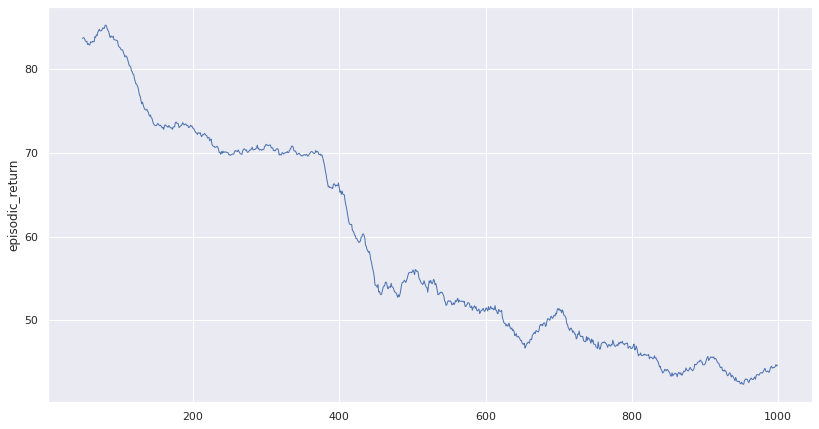

In [8]:
plot(return_dir)

In [11]:
returns = pd.read_csv(return_dir)

In [13]:
returns.describe()

,episodic_return
count,1000.000000
mean,58.561000
std,15.389123
min,28.000000
25%,45.000000
50%,57.000000
75%,70.000000
max,105.000000
